# Classification d'astres par rapport aux données du SDSS
## Mattias Eyherabide

<img src="pic/M51.jpg">
Image de M51 du SDSS

# Présentation
## SDSS

Le SDSS (Sloan Digital Sky Survey ou le Relevé numérique du ciel Sloan) est un programme Américain permettant de réaliser des relevés d'objets celestes grâce à un telescope optique situé au nouveau Mexique. Ces relevés ont pour but de cartographier environs 25% du ciel, soit 100 millions d'objets celestes.

Site internet : http://www.sdss3.org/index.php

## Dataset

Le dataset suivant a été récupéré sur Kaggle(https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey). 
D'après le nom du fichier, c'est un dataset ayant été récupéré le 27/02/2018 à 18h51 sur Skyserver (permettant de récuperer les données du SDSS).
Ce dataset dispose de 18 colonnes. Nous verrons que beaucoup sont inutile dans notre cas.

Le target de ce dataset est la colonne "Class" qui détermine trois types d'astres différents : "GALAXY", "STARS", "QSE" correspondant aux quasars (https://fr.wikipedia.org/wiki/Quasar).



# Traitement des données

## Importation des bibliothèques

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Analyse de base

In [16]:
data = pd.read_csv('./Dataset/SDSS_2018.csv')

In [17]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [18]:
data.shape

(10000, 18)

## Checklist de base
### Analyse de forme : 
- **Variable target** : Class
- **lignes et colonnes** : 10000, 18
- **Type de variables** : Majortiée de numérique, le reste sont objet (ici du texte)
- **Analyse des valeurs manquantes** : Aucunes valeurs manquantes

### Types de données

<AxesSubplot:ylabel='None'>

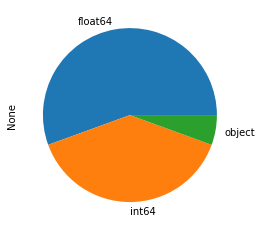

In [19]:
df = data
df.dtypes.value_counts().plot.pie()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


### Recherche de valeurs manquantes

In [21]:
df.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

## Analyses

### Nettoyage des données

Nous constatons que dans ce dataset, nous avons différents identifiants uniques. Ces données ne vont être utiles pour notre analyse, elles pourraient surtout créer des valeurs abairantes pour notre analyse comme "objid", "spacobjid" et "fiberid". Mais ce n'est pas tout, d'après le détail des tuples sur le site de SDSS : http://www.sdss3.org/dr9/imaging/imaging_basics.php nous contatons que les tuples "run", "rerun", "camcol" et "field". Nous allons donc les retirer de notre dataset.

In [22]:
df.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'fiberid'], axis=1, inplace=True)

In [23]:
df.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111,3306,54922
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590,3306,54922


### Exemen du target 

<AxesSubplot:xlabel='class', ylabel='Count'>

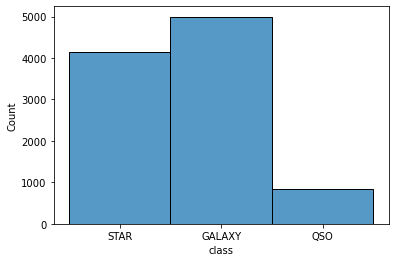

In [24]:
sns.histplot(df['class'])

Nous constatons une majoritée d'étoiles et de galaxies, nous devons analyser la corélation entre les features et la classe quasars pour mieux comprendre.

### Exemen des features

### Analyse des types numériques

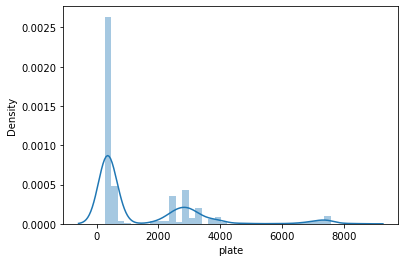

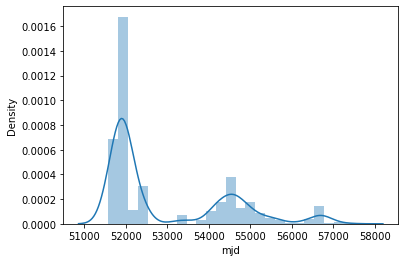

In [25]:
for col in df.select_dtypes('int'):
    plt.figure()
    sns.distplot(df[col])

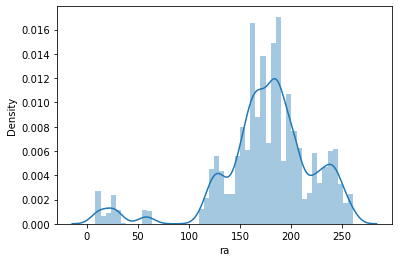

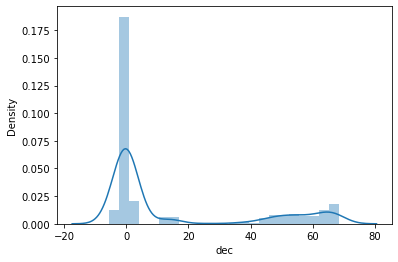

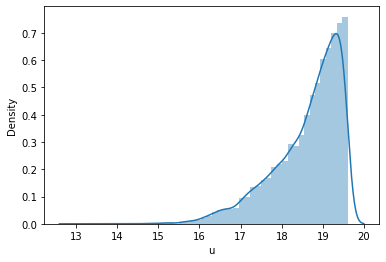

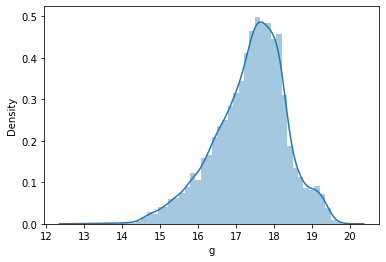

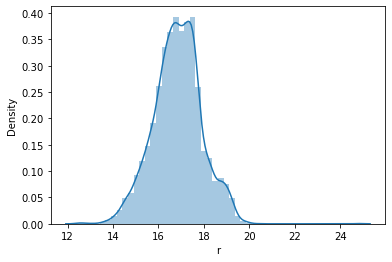

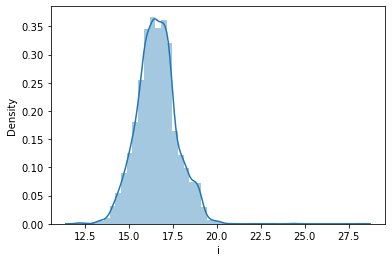

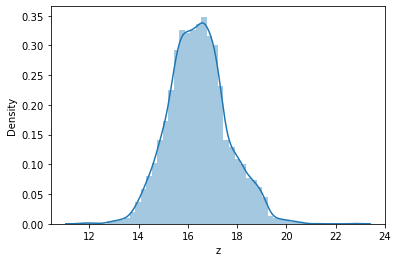

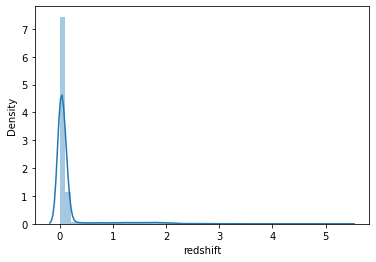

In [26]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])